In [1]:
import mujoco
from mujoco import viewer

In [2]:
import distutils.util
import os
import subprocess
if subprocess.run('nvidia-smi').returncode:
  raise RuntimeError(
      'Cannot communicate with GPU. '
      'Make sure you are using a GPU Colab runtime. '
      'Go to the Runtime menu and select Choose runtime type.')

%env MUJOCO_GL=egl

import time
import itertools
import numpy as np

import numpy as np
from typing import Callable, Optional, Union, List
import scipy.linalg

import mediapy as media
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True, linewidth=100)

from IPython.display import clear_output
clear_output()

In [3]:
model = mujoco.MjModel.from_xml_path('/home/workstation4/daniel/OCRL_piano/mujoco_menagerie/shadow_hand/scene_right.xml')
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

""

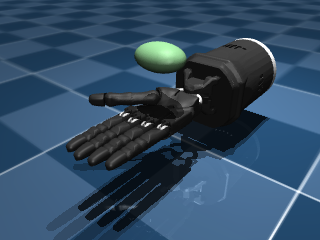

qpos:  [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.3 0.  0.1 1.  0.  0.  0. ]
size of qpos:  31

Joint Ranges:  [[-0.524  0.175]
 [-0.698  0.489]
 [-0.349  0.349]
 [-0.262  1.571]
 [ 0.     1.571]
 [ 0.     1.571]
 [-0.349  0.349]
 [-0.262  1.571]
 [ 0.     1.571]
 [ 0.     1.571]
 [-0.349  0.349]
 [-0.262  1.571]
 [ 0.     1.571]
 [ 0.     1.571]
 [ 0.     0.785]
 [-0.349  0.349]
 [-0.262  1.571]
 [ 0.     1.571]
 [ 0.     1.571]
 [-1.047  1.047]
 [ 0.     1.222]
 [-0.209  0.209]
 [-0.698  0.698]
 [-0.262  1.571]
 [ 0.     0.   ]]

control:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
size of control:  20


In [4]:
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

print("qpos: ", data.qpos)
print("size of qpos: ", model.nq)
print()

print("Joint Ranges: ", model.jnt_range)
print()


print("control: ", data.ctrl)
print("size of control: ", model.nu)    
# mujoco.viewer.launch(model)

""

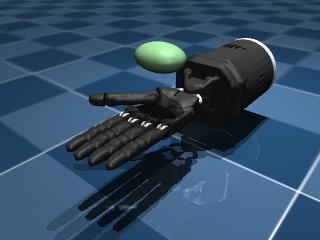

Start qpos:  [-0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.   0.  -0.  -0.  -0.  -0.   0.  -0.  -0.  -0.
  0.  -0.  -0.   0.   0.   0.3  0.   0.1  1.   0.   0.   0. ]
Timestep (s): 0.002


In [5]:
mujoco.mj_resetData(model, data)
mujoco.mj_step(model, data) 
media.show_image(renderer.render())

start_pos = data.qpos.copy()
print("Start qpos: ", start_pos)
print("Timestep (s):", model.opt.timestep)



""

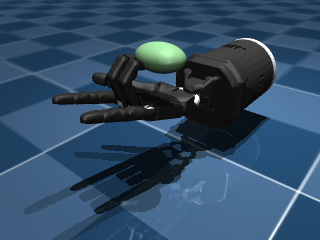

In [8]:
timestep = model.opt.timestep
end_time = 2

end_pos = start_pos.copy()
end_pos[0] = 0.2
end_pos[1] = 0.25
end_pos[7] = 1.0
end_pos[8] = 1.0
end_pos[9] = 1.0
end_pos[11] = 1.0
end_pos[12] = 1.0
end_pos[13] = 1.0

num_points = int(end_time / timestep)
interpolated_pos = np.linspace(start_pos, end_pos, num_points)

data.qpos = end_pos.copy()
mujoco.mj_step(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

In [24]:
DURATION = 2.0
FRAMERATE = 60

mujoco.mj_resetData(model, data)
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 0.5

frames = []
i = 0
while data.time < DURATION:
  # Set control vector.
  # data.ctrl = np.random.randn(model.nu)
  data.qpos = interpolated_vectors[int(data.time/timestep)]

  # Step the simulation.
  mujoco.mj_step(model, data)

  # Render and save frames.
  if len(frames) < data.time * FRAMERATE:
    camera.lookat = data.body('rh_wrist').subtree_com

    renderer.update_scene(data, camera)
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=FRAMERATE)


In [13]:
DURATION = 3
FRAMERATE = 60

mujoco.mj_resetData(model, data)
frames = []


while data.time < DURATION:
  # Set control vector.
  data.ctrl = np.random.randn(model.nu)
  # data.qpos = np.random.rand(model.nq)

  # Step the simulation.
  mujoco.mj_step(model, data)

  # Render and save frames.
  if len(frames) < data.time * FRAMERATE:
    renderer.update_scene(data)
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=FRAMERATE)

In [ ]:
mujoco.mj_resetData(model, data)
print(len(data.ctrl))

# mujoco.mj_forward(model, data)
# data.qacc = 0  # Assert that there is no the acceleration.
# mujoco.mj_inverse(model, data)
# print(data.qfrc_inverse)

20
